# Import the package

In [1]:
from grmpy.test.auxiliary import refactor_results
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline  

import grmpy

/home/sebastian/anaconda3/envs/grmpy_tutorial/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Simulation Process

In [31]:
df = grmpy.simulate('tutorial.grmpy.ini')
 

In [4]:
df.head()

,Y,D,X_0,X_1,X_2,X_3,Z_0,Z_1,Y1,Y0,U1,U0,UC,V
0,3.682474,0,1.0,0.0,1.012175,-0.653786,1.0,0.514857,4.704468,3.682474,0.367474,0.410380,0.484450,0.527356
1,1.558495,0,1.0,1.0,0.682808,-0.590194,1.0,0.609202,5.647489,1.558495,0.847235,-1.789534,4.309898,1.673129
2,0.241303,0,1.0,0.0,-0.036321,-0.196745,1.0,-0.495743,2.341456,0.241303,0.095008,-1.420377,2.287648,0.772262
3,1.981197,0,1.0,1.0,-0.534595,-0.499604,1.0,0.141740,2.781138,1.981197,-0.251911,0.052811,-0.438839,-0.134117
4,1.235780,0,1.0,1.0,-0.850554,-0.201994,1.0,0.603826,-0.617849,1.235780,-2.781097,-0.043756,-2.205267,0.532074


### The simulation process provides a the simulated data as a pickle file

In [6]:
pickle_file = pd.read_pickle('data.grmpy.pkl')
pickle_file.head()

,Y,D,X_0,X_1,X_2,X_3,Z_0,Z_1,Y1,Y0,U1,U0,UC,V
0,3.682474,0,1.0,0.0,1.012175,-0.653786,1.0,0.514857,4.704468,3.682474,0.367474,0.410380,0.484450,0.527356
1,1.558495,0,1.0,1.0,0.682808,-0.590194,1.0,0.609202,5.647489,1.558495,0.847235,-1.789534,4.309898,1.673129
2,0.241303,0,1.0,0.0,-0.036321,-0.196745,1.0,-0.495743,2.341456,0.241303,0.095008,-1.420377,2.287648,0.772262
3,1.981197,0,1.0,1.0,-0.534595,-0.499604,1.0,0.141740,2.781138,1.981197,-0.251911,0.052811,-0.438839,-0.134117
4,1.235780,0,1.0,1.0,-0.850554,-0.201994,1.0,0.603826,-0.617849,1.235780,-2.781097,-0.043756,-2.205267,0.532074


### Plot - Treatment effects and benefit distribution

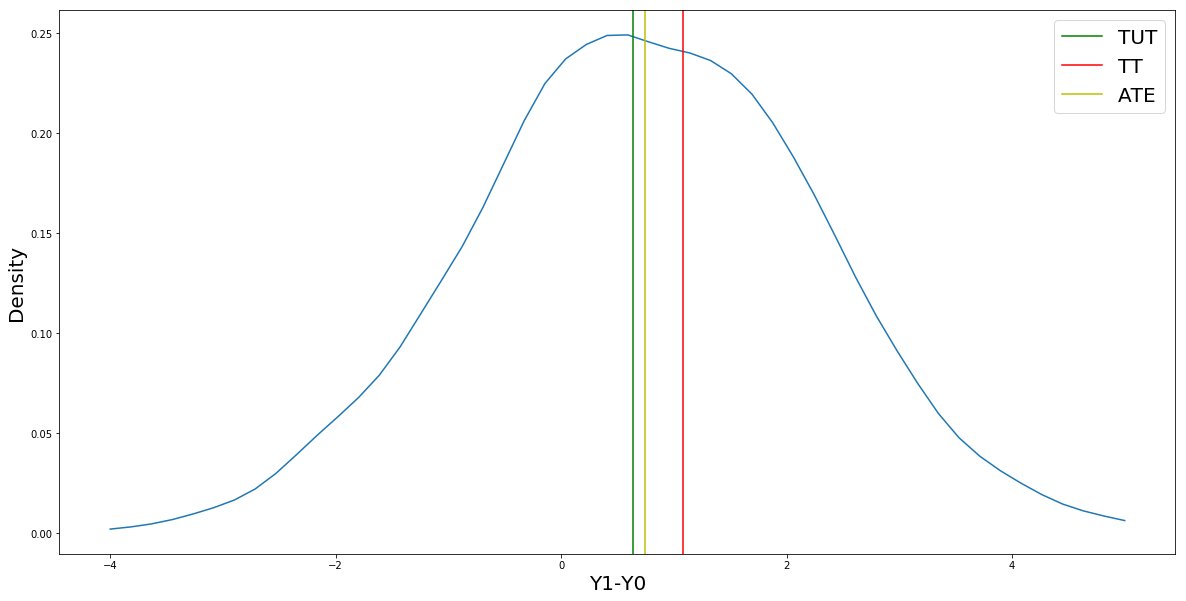

In [7]:
benefits= df.Y1 - df.Y0
TT = np.mean(benefits[df.D==1])
TUT = np.mean(benefits[df.D==0])
ATE = np.mean(benefits)
density = gaussian_kde(benefits)

xs = np.linspace(-4,5)
plt.figure(figsize=(20,10)) 

plt.plot(xs,density(xs))
plt.axvline(x=TUT, c='g', label='TUT')
plt.axvline(x=TT, c='r', label='TT')
plt.axvline(x=ATE, c='y',label='ATE')
plt.xlabel('Y1-Y0', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(fontsize=20)

plt.show()


In [28]:
df_ = grmpy.simulate('tutorial2.grmpy.ini')


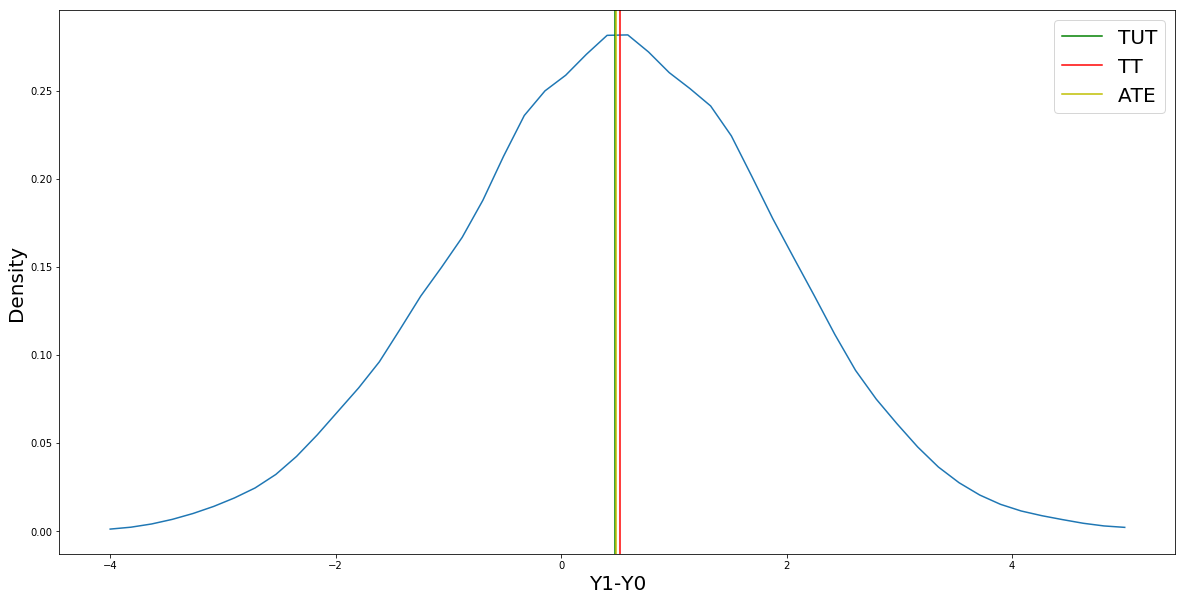

In [29]:
benefits_ = df_.Y1 - df_.Y0
TT = np.mean(benefits_[df.D==1])
TUT = np.mean(benefits_[df.D==0])
ATE = np.mean(benefits_)
density = gaussian_kde(benefits_)

xs = np.linspace(-4,5)
plt.figure(figsize=(20,10)) 

plt.plot(xs,density(xs))
plt.axvline(x=TUT, c='g', label='TUT')
plt.axvline(x=TT, c='r', label='TT')
plt.axvline(x=ATE, c='y',label='ATE')
plt.xlabel('Y1-Y0', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(fontsize=20)

plt.show()


# Estimation

### init: Init file values as start values

In [41]:
results = grmpy.estimate('tutorial.grmpy.ini')

In [42]:
refactor_results(results, 'tutorial.grmpy.ini')

### Plot Estimation Results

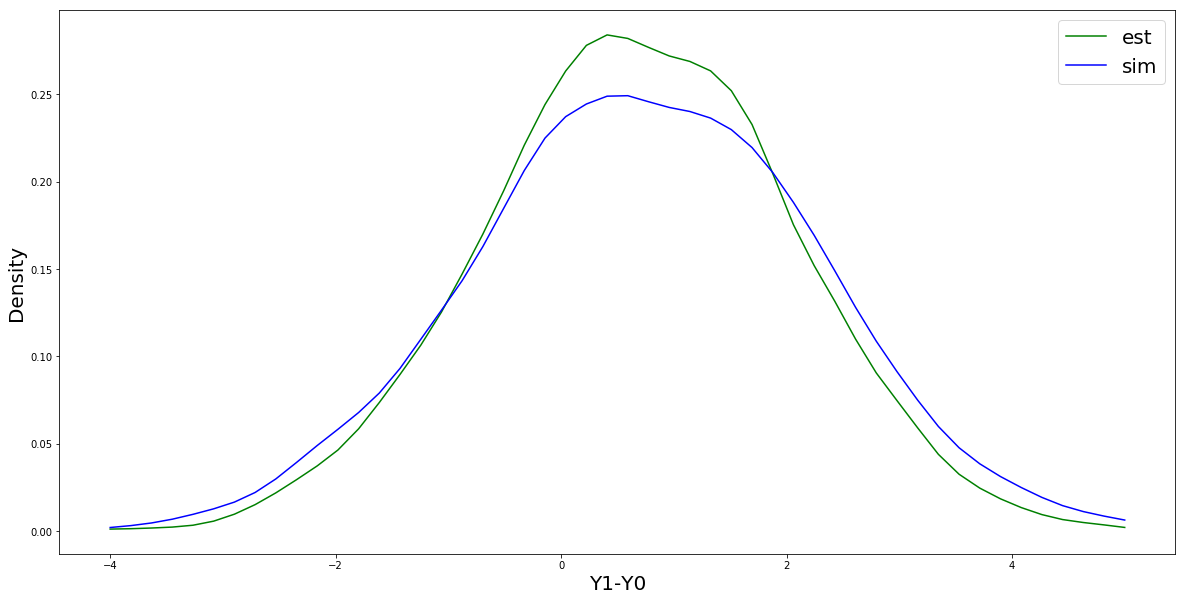

In [43]:
df2 = grmpy.simulate('test.grmpy.ini')
benefits_est = df2.Y1 - df.Y0
density = gaussian_kde(benefits)
density_est = gaussian_kde(benefits_est)
xs = np.linspace(-4,5)
plt.figure(figsize=(20,10)) 

plt.plot(xs, density_est(xs), c='g', label='est')
plt.plot(xs, density(xs), c='b', label='sim')
plt.xlabel('Y1-Y0', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(fontsize=20)


plt.show()


### auto:  Start values are derived from a simple OLS and a Probit regression


In [44]:
results = grmpy.estimate('tutorial_auto.grmpy.ini')

In [45]:
refactor_results(results, 'tutorial_auto.grmpy.ini')

### Plot Estimation Results

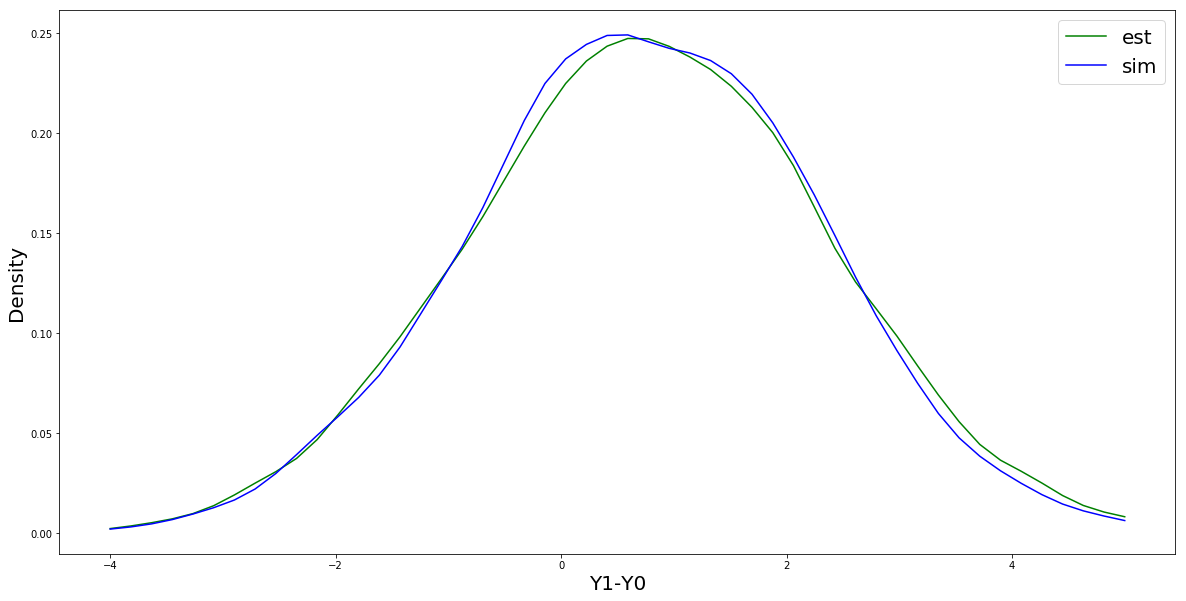

In [46]:
df2 = grmpy.simulate('test.grmpy.ini')
benefits_est = df2.Y1 - df.Y0
density = gaussian_kde(benefits)
density_est = gaussian_kde(benefits_est)
xs = np.linspace(-4,5)
plt.figure(figsize=(20,10)) 

plt.plot(xs, density_est(xs), c='g', label='est')
plt.plot(xs, density(xs), c='b', label='sim')
plt.xlabel('Y1-Y0', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(fontsize=20)


plt.show()
